Stay focused and concentrated, follow the rubric, explore/fit/model the data, practice your presentation, and you will ace this.
Despite, losing most of Thurs & Fri due to circumstances, you got this!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### function station for scratch
### wrangle.py for functions implemented

In [2]:
import wrangle


In [3]:
train, validate, test = wrangle.wrangle_zillow()


In [4]:
train.head()


,bedroom_count,bathroom_count,square_feet,tax_value,county,age,county_Orange,county_Ventura,county_tax_avg,baseline,square_feet_scaled,tax_value_scaled
33416,2.0,1.0,957.0,512701.0,Orange,69.0,1,0,442218.98,335130.0,-0.002050,157.994141
10256,4.0,3.0,2290.0,317784.0,Orange,66.0,1,0,442218.98,335130.0,-0.000860,97.890225
9626,3.0,1.0,1063.0,428204.0,LA,69.0,0,0,338888.35,335130.0,-0.001956,131.938945
20264,3.0,3.0,1904.0,660068.0,LA,78.0,0,0,338888.35,335130.0,-0.001205,203.435708
41772,4.0,2.5,2271.0,604000.0,Ventura,21.0,0,1,427070.80,335130.0,-0.000877,186.146778


In [5]:
train['bedroom_count'] = train['bedroom_count'].astype(int)
#keep bathroom count as float bc you can have half bathrooms
train['square_feet'] = train['square_feet'].astype(int)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 33416 to 49366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedroom_count       25335 non-null  int64  
 1   bathroom_count      25335 non-null  float64
 2   square_feet         25335 non-null  int64  
 3   tax_value           25335 non-null  float64
 4   county              25335 non-null  object 
 5   age                 25335 non-null  float64
 6   county_Orange       25335 non-null  uint8  
 7   county_Ventura      25335 non-null  uint8  
 8   county_tax_avg      25335 non-null  float64
 9   baseline            25335 non-null  float64
 10  square_feet_scaled  25335 non-null  float64
 11  tax_value_scaled    25335 non-null  float64
dtypes: float64(7), int64(2), object(1), uint8(2)
memory usage: 2.2+ MB


In [7]:
train.shape[0]+ validate.shape[0] + test.shape[0]


# we lost a lot from the inital 52442

45242

# EXPLORE

In [22]:
def get_distribution(df):
    for i in df.columns:
        plt.figure(figsize=(9,5))
        sns.histplot(data = df, x=i)
    plt.show()

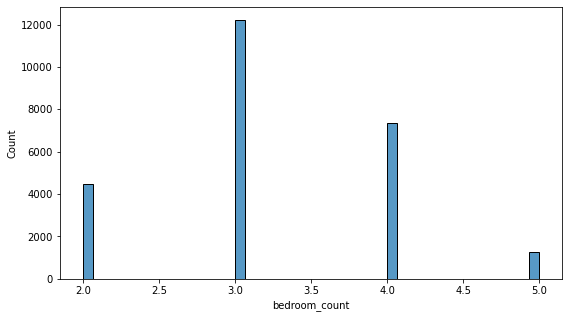

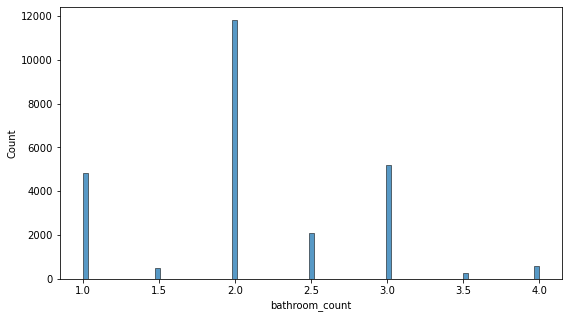

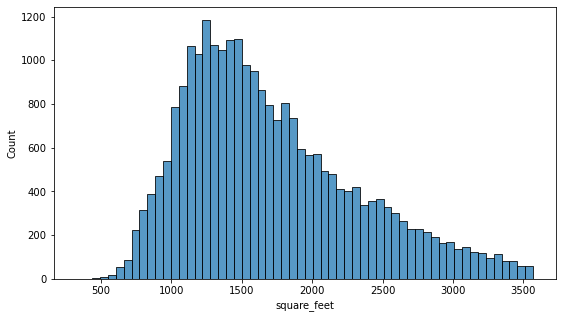

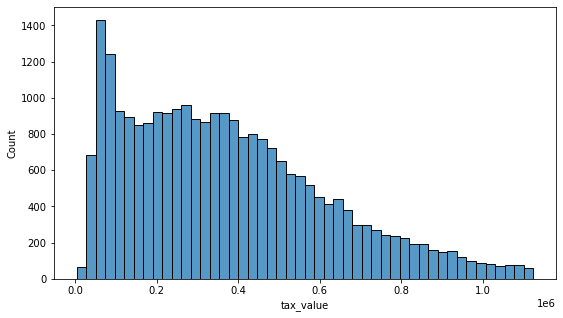

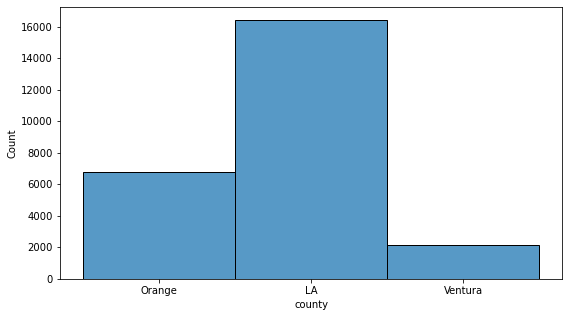

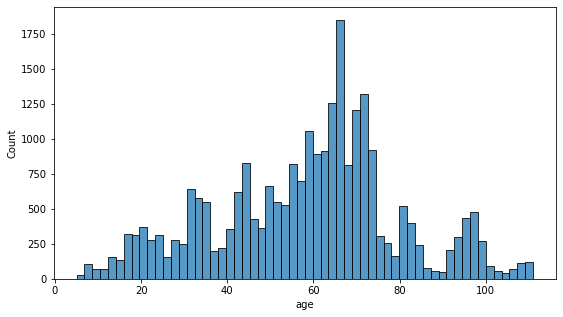

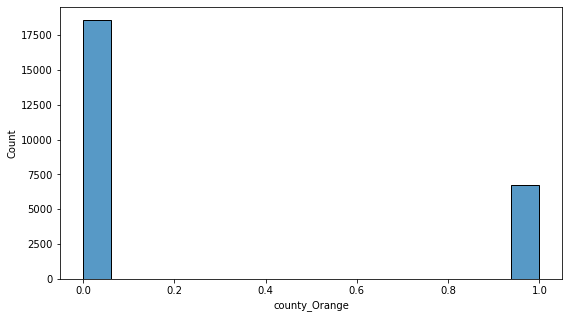

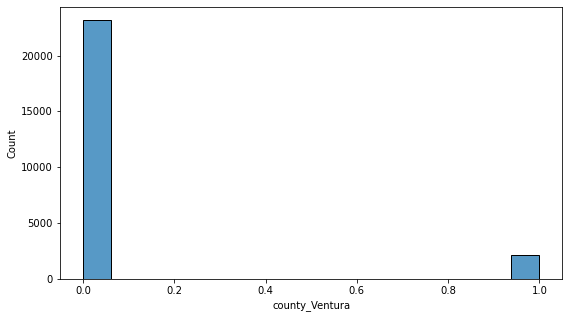

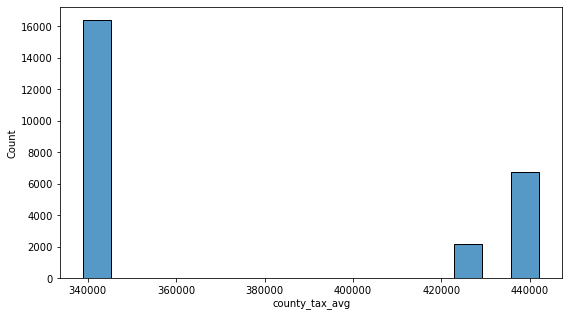

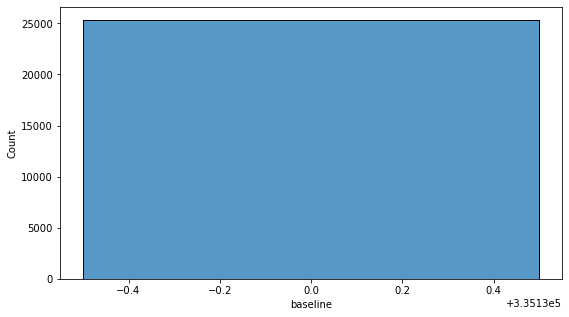

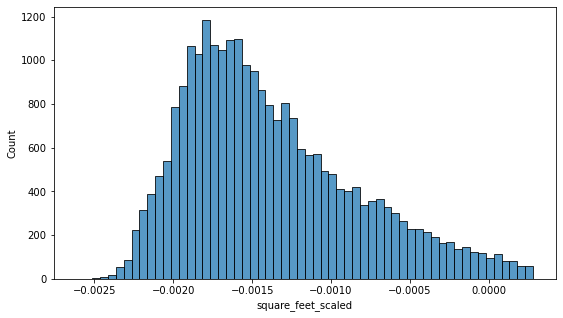

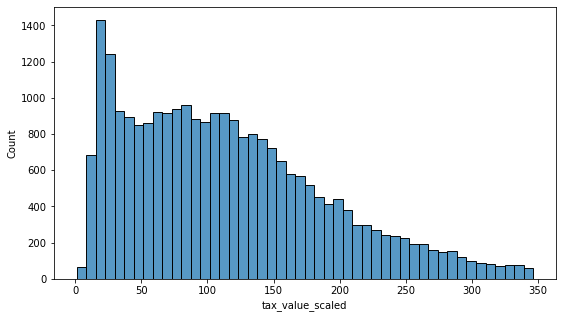

In [24]:
get_distribution(train)

In [27]:
def graph_distribution(df, target, x):
    plt.figure(figsize=(14,10))
    sns.histplot(data=df, x=x, hue=target, kde = False, bins = 1200)
    plt.xlim(0.5, 3)
    plt.xlabel('{} in Percentage'.format(x))

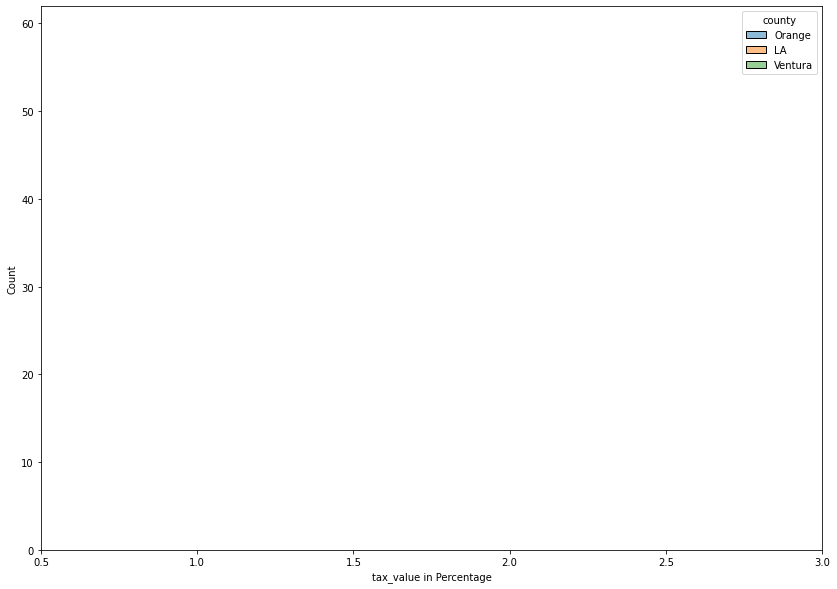

In [35]:
graph_distribution(train, 'county', 'tax_value')

<AxesSubplot:xlabel='county', ylabel='tax_value'>

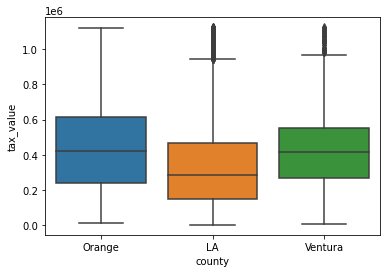

In [36]:
sns.boxplot(x=train.county,y='tax_value',data=train)

In [ ]:
county_graph = sns.countplot(data = train, x = 'county')
county_graph.set(Title = 'County cod')

In [10]:
#train = train.bedroom_count.astype(int)

<AxesSubplot:xlabel='age', ylabel='tax_value'>

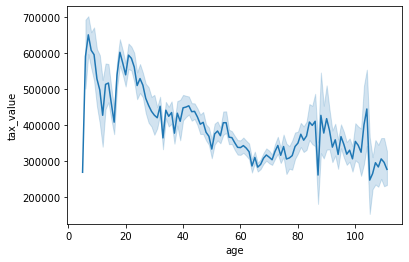

In [33]:
sns.lineplot(x = 'age',y='tax_value',data=train)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 33416 to 49366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedroom_count       25335 non-null  int64  
 1   bathroom_count      25335 non-null  float64
 2   square_feet         25335 non-null  int64  
 3   tax_value           25335 non-null  float64
 4   county              25335 non-null  object 
 5   age                 25335 non-null  float64
 6   county_Orange       25335 non-null  uint8  
 7   county_Ventura      25335 non-null  uint8  
 8   county_tax_avg      25335 non-null  float64
 9   baseline            25335 non-null  float64
 10  square_feet_scaled  25335 non-null  float64
 11  tax_value_scaled    25335 non-null  float64
dtypes: float64(7), int64(2), object(1), uint8(2)
memory usage: 2.2+ MB


In [12]:
# df['bedroom_count'].astype(int)
# df['bathroom_count'].astype(int)
# df['square_feet'].astype(int)
# df['year_built'].astype(int)

In [13]:
# col_type = ['bedroom_count', 'bathroom_count', 'square_feet', 'year_built']
# for col in df.columns[df.columns]:
#     df[col] = df[col].astype(int)

In [14]:
#no nulls
train.isnull().sum()

bedroom_count         0
bathroom_count        0
square_feet           0
tax_value             0
county                0
age                   0
county_Orange         0
county_Ventura        0
county_tax_avg        0
baseline              0
square_feet_scaled    0
tax_value_scaled      0
dtype: int64

In [15]:
train['tax_value'] = train['tax_value'].astype(int)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25335 entries, 33416 to 49366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedroom_count       25335 non-null  int64  
 1   bathroom_count      25335 non-null  float64
 2   square_feet         25335 non-null  int64  
 3   tax_value           25335 non-null  int64  
 4   county              25335 non-null  object 
 5   age                 25335 non-null  float64
 6   county_Orange       25335 non-null  uint8  
 7   county_Ventura      25335 non-null  uint8  
 8   county_tax_avg      25335 non-null  float64
 9   baseline            25335 non-null  float64
 10  square_feet_scaled  25335 non-null  float64
 11  tax_value_scaled    25335 non-null  float64
dtypes: float64(6), int64(3), object(1), uint8(2)
memory usage: 2.2+ MB


In [37]:
#implemented
# Federal Information Processing System (FIPS)

# 6037	Los Angeles	CA
# 6059	Orange	CA
# 6111	Ventura	CA

In [38]:
train.county.value_counts()

LA         16420
Orange      6756
Ventura     2159
Name: county, dtype: int64

In [18]:
#Add 3 mean values in function_station

LA = train[train.county == 'LA']
LA_avg = round(LA.tax_value.mean(),2)

In [19]:
LA_avg

336651.8

In [20]:
45627

45627

In [40]:
2159+6756

8915

In [ ]:
# Here we can see that LA county represents the greatest number of homes in the lower 50% of tax valuations

plt.figure(figsize=(12, 6))
sns.histplot(data = train, x='tax_value', hue='county', palette = 'twilight_shifted');

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(train[features].corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, 
                           center=0, linewidths=4, linecolor='silver')
plt.title('Zillow Correlation Heatmap of Trained Data', fontsize=18, pad=12)

In [ ]:
#pulled for better format
print('Training/In-Sample: \n')
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train['tax_value'])
train['y_hat'] = lm.predict(X_train)
model.regression_errors(y_train['tax_value'], train['y_hat'])

In [ ]:
#pulled for better format
print('Validation/Out-Of-Sample: \n')
lm = LinearRegression(normalize=True)
lm.fit(X_validate, y_validate['tax_value'])
validate['y_hat'] = lm.predict(X_validate)
model.regression_errors(y_validate['tax_value'], validate['y_hat'])

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

# /6

At least 4 of the questions asked and answered of the data are shared in the final report notebook. You should call out questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. This does not take the place of stating your null hypothesis/alternative hypothesis when doing a statistical test. But those hypotheses are generally for you. By writing questions that you intend to answer with visualizations and statistical tests in natural language, like "Are office supplies leading to differences in profit in Texas?", you are able to guide both yourself and your reader through the highlights of your analysis. You ask a question, create a visual, run a statistical test (if appropriate), and wrap it nicely with a markdown cell that contains a clear answer in layman's terms. You do all that before moving to the next question.

# /6

At least 5 visualizations are included in your final report. The ones included answer a question (remember, NO is an answer) and the one(s) to provide necessary context (such as the distribution of the target variable). All statistical tests included in the final report should be supported with an visualization of the interaction of the variables being tested. Charts in the final report should have titles and labels that are descriptive and useful for the end user/audience/consumer of the report. All visualizations in the final report are mentioned or discussed if a verbal presentation is given.

/6

At least 2 statistical tests are included in your final report. The correct tests are run, given the data type and distribution, and the correct conclusions are drawn. - correlation: 2 continuous variables, normally distributed, testing for LINEAR correlation only (H_0: Not linearly dependent) - independent t-test: 1 continuous, somewhat normally distributed variable, one boolean variable, equal variance, independent (H_0: population mean of each group is equal) - chi-square test: 2 discrete variables. (H_0: the 2 variables are independent of each other). (other tests may be used)

# /6
Following your exploration section, you summarize your analysis (in a markdown cell using natural language): what you found and how you will use it moving forward. This includes key takeaways from all the questions answered in explore, a list of which features will be used in modeling and why, and which features will not move forward and why. You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.

/1
Having a baseline tells you whether a model you build using the features you selected is any better than predicting by using only the target variable. One way a baseline is created in classification is by making predictions purely based on the most common outcome class, like predicting that all titanic passengers will die, becuase the majroity did die. By doing that, you end up with the highest accuracy without using extra information from features. The baseline is based on the training dataset. For a continuous target variable, the baseline could be predicting that all salaries will be the median salary of our labeled train data. The predictions should be made on the training data using this information (like the predicted value, y_hat, for all passengers "survived" == 0) and then performance evaluated to measure your models against. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

/1
All models should be evaluated on train: the training smaple is our largest sample, and it is a sample of data we have to both fit the model AND see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

/1

The top models should be evaluated with the validation sample dataset. It is important to use the validate sample for checking for any overfitting that may have occurred when fitting the model on train. If you are creating 10's of models, it is also important to only validate a handful of your top models with the Validate dataset. Otherwise, your data will have seen validate as much as train and you could accidentally introduce some implicit bias based on data and results you see while validating on so many models.

/2

Clear communication as to how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy. If so, why? If you use multiple metrics, how will you decide which to select if metric is better for model A but another is better for model B? Will you rank them? Find a way to aggregate them into a single metric you can use to rank?

/2

Your top performing model, and only your top performing model should be evaluated on your test dataset. The purpose of having a test dataset to evaluate only the final model on is to have an estimate of how the model will perform in the future on data it has never seen.

/3

The 3 models can differ based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data.


/6

Your code contains code comments that are helpful to the reader in understanding what each blocks/lines of code are doing.


/6

Notebook contains adequate markdown that documents your thought process, decision making, and navigation through the pipeline. This should be present throughout the notebook consistently, wtih not just headers, but plenty of content that guides the reader and leaves no questions or doubt as to why you did something, e.g.


/2

Always be aware of the audience and setting for your presentation. What is the appropriate level of technicality? What is the appropriate depth given audience, setting and medium in which its delivered. The way you communicate should be appropriate for the audience: volume, speed of talk, flow, professionalism. (Zillow Data Science Team, virtually delivered via jupyter notebook).


/2

Your conclusion summary should addresses the questions you raised in the opening of the project, which we would want to see at the end of every final notebook. Ideally, when the deliverable is a report, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.


/2

Your notebook should end with actionable recommendations based on your insights and analysis on a way to make a better model, such as a new feature or an algorithm or something you found that doesn't work.


/2

Your conclusion should include next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!

/2

Presentation is concluded with a summary of what was found, recommendations, and next steps. The presentation does not just drop off after modeling, but the entire project is nicely tied up and summarized.


/2 

Time limit of 5 minutes is adhered to. The time is managed well, in that there is appropriate time spent on each section. The time of 5 minutes should not be met by talking quickly but by reducing the amount or depth of information conveyed, and by finding easier and more simplified methods to convey the more complex information. The speech should be natural, and take the time needed for the audience to consume the information. So the time is well spent when you have practiced and you have taken the extra time it takes to reduce the content in your notebook and presentation. Time should not be spent scrolling through 10's of visualizations or hundreds of lines of code.

/2

Your final notebook should run without error. One error in a notebook can lead to the rest of it erroring out. If you have a reader who doesn't know python, they will then not be able to consume your report.


/3

Accurate sample was acquired from the mySQL zillow database. Properties_2017 table was used. Predictions_2017 was used to filter to properties that had a transaction during 2017. Properties were then filtered down to the single family homes only. You should have ended with 52,442 properties based on that criteria. Be sure and add a conditional statement to your acquire script to read a local csv of the sample that you saved so you don't have to run the query every time you re-run your notebook!

### 52,442:

SELECT * FROM properties_2017
JOIN propertylandusetype USING(propertylandusetypeid)
JOIN predictions_2017 USING(parcelid)
WHERE propertylandusetype.propertylandusetypeid = 261 AND 279;

/3

Module(s) with user-defined functions for acquiring and preparing the data should be created. Each function contains a helpful docstring explaining what it does, its input(s) and output(s). Credentials (such as in an env.py file) are NOT included in the public repo.


/1

When splitting data into samples, someone should be able to run your code and get the same observations in the same samples, i.e. reproduce your split, because you set the random state to a seed. There should be 3 adequately sized samples - train, validate, and test. As a good starting point, 50%, 30%, and 20%, (or 50%, 26%, 24% for simplicity when doing the splitting) are reasonable split proportions. But that can vary depending on the number of observations you have. Test can go as low as 10% if needed.


In [ ]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#tax_value mean
appraised_value_pred_mean = y_train['appraised_value'].mean()
y_train['appraised_value_pred_mean'] = appraised_value_pred_mean
y_validate['appraised_value_pred_mean'] = appraised_value_pred_mean

#tax_value_median
appraised_value_pred_median = y_train['appraised_value'].median()
y_train['appraised_value_pred_median'] = appraised_value_pred_median
y_validate['appraised_value_pred_median'] = appraised_value_pred_median

#RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.appraised_value, y_train.appraised_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.appraised_value, y_validate.appraised_value_pred_mean)**(1/2)

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('----------------------------------')

#RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.appraised_value, y_train.appraised_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.appraised_value, y_validate.appraised_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('----------------------------------')
r2_baseline = r2_score(y_validate.appraised_value, y_validate.appraised_value_pred_mean)
print(f'The r^2 score for baseline is {r2_baseline}')